#**Scale Numerical Data**

Many machine learning algorithms perform better when numerical input variables are scaled
to a standard range. This includes algorithms that use a weighted sum of the input, like
linear regression, and algorithms that use distance measures, like k-nearest neighbors. The two
most popular techniques for scaling numerical data prior to modeling are normalization and
standardization. 
* **Normalization** scales each input variable separately to the range of 0-1, which is
the range for 
floating-point values where we have the most precision. 
* **Standardization** scales
each input variable separately by subtracting the mean (called centering) and dividing by the
standard deviation to shift the distribution to have a mean of zero and a standard deviation of
one.

In this tutorial, you will learn:

* Data scaling is a recommended pre-processing step when working with many machine
learning algorithms.
* Data scaling can be achieved by normalizing or standardizing real-valued input and output
variables.
* How to apply standardization and normalization to improve the performance of predictive
modeling algorithms.

Adapted from Jason Brownlee. 2020. [Data Preparation for Machine Learning](https://machinelearningmastery.com/data-preparation-for-machine-learning/).

#Numerical Data Scaling Methods



##Data Normalization
Normalization is a rescaling of the data from the original range so that all values are within the
new range of 0 and 1. Normalization requires that you know or are able to accurately estimate
the minimum and maximum observable values. You may be able to estimate these values from
your available data.

In [1]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define min max scaler
# Transform features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such
# that it is in the given range on the training set, e.g. between
# zero and one.
scaler = MinMaxScaler()
# Fit to data, then transform it.
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


##Data Standardization
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed
values is 0 and the standard deviation is 1. This can be thought of as subtracting the mean
value or centering the data. Like normalization, standardization can be useful, and even
required in some machine learning algorithms when your data has input values with differing
scales. Standardization assumes that your observations fit a Gaussian distribution (bell curve)
with a well-behaved mean and standard deviation. You can still standardize your data if this
expectation is not met, but you may not get reliable results.

In [2]:
# example of a standardization
from numpy import asarray
from sklearn.preprocessing import StandardScaler
# define data
data = asarray([[100, 0.001],
[8, 0.05],
[50, 0.005],
[88, 0.07],
[4, 0.1]])
print(data)
# define standard scaler
# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
# Fit to data, then transform it.
scaled = scaler.fit_transform(data)
print(scaled)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]
[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


#Diabetes Dataset
The dataset classifies patient data as
either an onset of diabetes within five years or not. 
```
Number of Instances: 768
Number of Attributes: 8 plus class 
For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)
Missing Attribute Values: Yes
Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")
   Class Value  Number of instances
   0            500
   1            268
```

You can learn more about the dataset here:

* Diabetes Dataset File ([pima-indians-diabetes.csv](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv))
* Diabetes Dataset Details ([pima-indians-diabetes.names](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names))

###Download Diabetes data files

In [3]:
!pip install wget
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv" -o pima-indians-diabetes.csv
!python -m wget "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names" -o pima-indians-diabetes.names

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=83e0e8bd020fc1af1bad646596f7dd062308fb7a3bdbf0322f9eb2168b6ad504
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under pima-indians-diabetes.csv

Saved under pima-indians-diabetes.names


In [4]:
# load and summarize the diabetes dataset
from pandas import read_csv
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
print(dataset.head())
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe())

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1
(768, 9)
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

   

This confirms the 8
input variables, one output variable, and 768 rows of data. A statistical summary of the input
variables is provided show that each variable has a very different scale. This makes it a good
dataset for exploring data scaling methods.

We can create a histogram for each input variable. The plots confirm the differing scale
for each input variable and show that the variables have different scales.


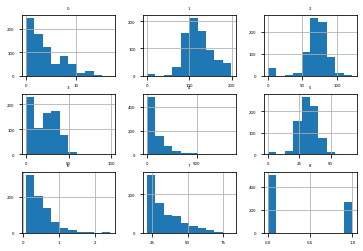

In [5]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Next, let's fit and evaluate a machine learning model on the raw dataset. We will use
a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated
stratified k-fold cross-validation.

In [6]:
# evaluate knn on the raw diabetes dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.717 (0.040)


In this case we can see that the model achieved a mean classification accuracy of about
71.7 percent.

#MinMaxScaler Transform
We can apply the **MinMaxScaler** to the diabetes dataset directly to normalize the input variables.
We will use the default configuration and scale values to the range 0 and 1. First, a **MinMaxScaler**
instance is defined with default hyperparameters. Once defined, we can call the **fit.transform**()
function and pass it to our dataset to create a transformed version of our dataset.

##Summary of each input variable

In [7]:
# visualize a minmax scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a min-max scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())

                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.234095    0.333333  
max      1.000

We can see that the
distributions have been adjusted and that the minimum and maximum values for each variable
are now 0.0 and 1.0 respectively.

##Histogram plots of the variables

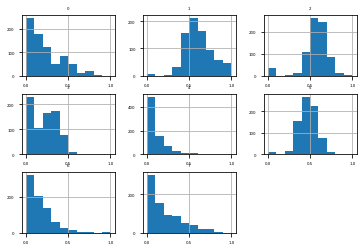

In [8]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Histogram plots of the variables are created, although the distributions don't look much
different from their original distributions seen in the previous section. We can confirm that the
minimum and maximum values are zero and one respectively, as we expected.

##Model evaluation

Next, let's evaluate the same KNN model as the previous section, but in this case, on a
MinMaxScaler transform of the dataset.

In [9]:
# evaluate knn on the diabetes dataset with minmax scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.739 (0.053)


We can see that the MinMaxScaler transform results in a lift in
performance from 71.7 percent accuracy without the transform to about 73.9 percent with the
transform.

#StandardScaler Transform
We can apply the StandardScaler to the diabetes dataset directly to standardize the input
variables. We will use the default configuration and scale values to subtract the mean to center
them on 0.0 and divide by the standard deviation to give the standard deviation of 1.0. First, a
StandardScaler instance is defined with default hyperparameters. Once defined, we can call
the fit transform() function and pass it to our dataset to create a transformed version of our
dataset.

##Summary of each input variable

In [10]:
# visualize a standard scaler transform of the diabetes dataset
from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.544261e-17  3.614007e-18 -1.327244e-17  7.994184e-17 -3.556183e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.295979e-16  2.462585e-16  1.857600e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e+00  
25%   -5.955785e-01 -6.889685e-01 -7.8

We can see that the
distributions have been adjusted and that the mean is a very small number close to zero and
the standard deviation is very close to 1.0 for each variable.

## Histogram plots of the variables

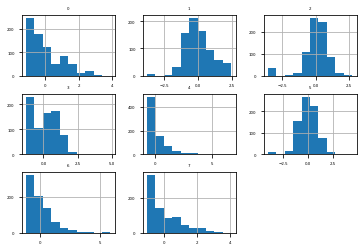

In [11]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]
# show the plot
pyplot.show()

Histogram plots of the variables are created, although the distributions don't look much
different from their original distributions seen in the previous section other than their scale on
the x-axis. We can see that the center of mass for each distribution is centered on zero, which is
more obvious for some variables than others.

##Model evaluation
Next, let's evaluate the same KNN model as the previous section, but in this case, on a
StandardScaler transform of the dataset. The complete example is listed below.

In [12]:
# evaluate knn on the diabetes dataset with standard scaler transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load the dataset
dataset = read_csv('pima-indians-diabetes.csv', header=None)
data = dataset.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.741 (0.050)


We can see that the StandardScaler transform results in a lift in
performance from 71.7 percent accuracy without the transform to about 74.1 percent with the
transform, slightly higher than the result using the MinMaxScaler that achieved 73.9 percent.